#### Import necessary libraries

In [1367]:
import pandas as pd
import torch
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from torch import nn
import warnings
import numpy as np
warnings.filterwarnings('ignore')

#### Import files into dataframe

In [1368]:
file_path = "Housing.csv"

In [1369]:
df = pd.read_csv(file_path)

In [1370]:
df = df.sample(frac=1, random_state=42)

In [1371]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
316,4060000,5900,4,2,2,no,no,yes,no,no,1,no,unfurnished
77,6650000,6500,3,2,3,yes,no,no,no,yes,0,yes,furnished
360,3710000,4040,2,1,1,yes,no,no,no,no,0,no,semi-furnished
90,6440000,5000,3,1,2,yes,no,no,no,yes,0,no,semi-furnished
493,2800000,3960,3,1,1,yes,no,no,no,no,0,no,furnished


In [1372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 545 entries, 316 to 102
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 59.6+ KB


In [1373]:
categorical_features = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus','parking',]
numerical_features = [['price','area','bedrooms', 'bathrooms','stories']]

In [1374]:
df.shape

(545, 13)

#### Feature Engineering

In [1375]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [1376]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [1377]:
le = LabelEncoder()
for column in categorical_features:
    df[column] = le.fit_transform(df[column])

In [1378]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
316,4060000,5900,4,2,2,0,0,1,0,0,1,0,2
77,6650000,6500,3,2,3,1,0,0,0,1,0,1,0
360,3710000,4040,2,1,1,1,0,0,0,0,0,0,1
90,6440000,5000,3,1,2,1,0,0,0,1,0,0,1
493,2800000,3960,3,1,1,1,0,0,0,0,0,0,0


In [1379]:
for column in numerical_features:
    df[column] = np.log(df[column])

In [1380]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
316,15.216694,8.682708,1.386294,0.693147,0.693147,0,0,1,0,0,1,0,2
77,15.710127,8.779557,1.098612,0.693147,1.098612,1,0,0,0,1,0,1,0
360,15.126542,8.304000,0.693147,0.000000,0.000000,1,0,0,0,0,0,0,1
90,15.678039,8.517193,1.098612,0.000000,0.693147,1,0,0,0,1,0,0,1
493,14.845130,8.283999,1.098612,0.000000,0.000000,1,0,0,0,0,0,0,0


In [1381]:
scaler = MinMaxScaler()
for column in numerical_features:
    df[column] = scaler.fit_transform(df[column])

In [1382]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
316,0.414944,0.557813,0.773706,0.5,0.500000,0,0,1,0,0,1,0,2
77,0.658236,0.600212,0.613147,0.5,0.792481,1,0,0,0,1,0,1,0
360,0.370494,0.392021,0.386853,0.0,0.000000,1,0,0,0,0,0,0,1
90,0.642415,0.485354,0.613147,0.0,0.500000,1,0,0,0,1,0,0,1
493,0.231740,0.383265,0.613147,0.0,0.000000,1,0,0,0,0,0,0,0


<Axes: >

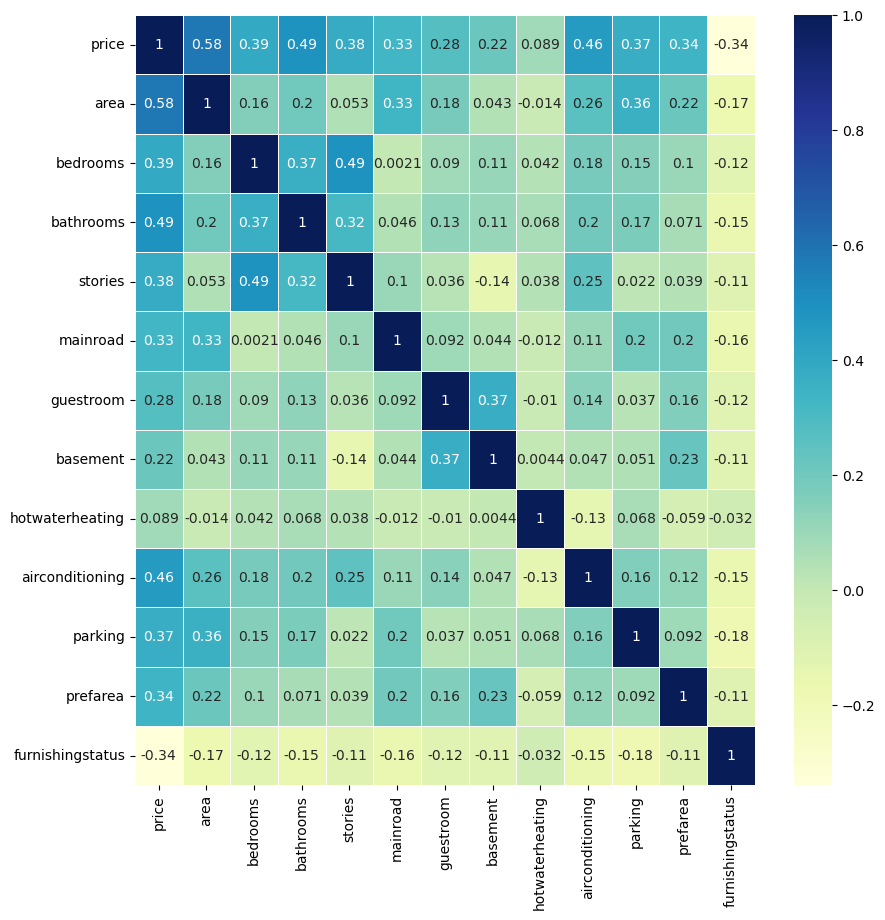

In [1383]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df.corr(), cmap="YlGnBu", linewidths=.5, ax=ax, annot=True) 

In [1384]:
# df = df.drop(['bedrooms'], axis=1)

In [1385]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
316,0.414944,0.557813,0.773706,0.5,0.500000,0,0,1,0,0,1,0,2
77,0.658236,0.600212,0.613147,0.5,0.792481,1,0,0,0,1,0,1,0
360,0.370494,0.392021,0.386853,0.0,0.000000,1,0,0,0,0,0,0,1
90,0.642415,0.485354,0.613147,0.0,0.500000,1,0,0,0,1,0,0,1
493,0.231740,0.383265,0.613147,0.0,0.000000,1,0,0,0,0,0,0,0


#### Train-test split

In [1386]:
# X = df_new.iloc[:,1:]
# X = torch.from_numpy(selected_df['area_log'].values.reshape(-1,1)).float()
X = torch.from_numpy(df.iloc[:,1:].values)
X

tensor([[0.5578, 0.7737, 0.5000,  ..., 1.0000, 0.0000, 2.0000],
        [0.6002, 0.6131, 0.5000,  ..., 0.0000, 1.0000, 0.0000],
        [0.3920, 0.3869, 0.0000,  ..., 0.0000, 0.0000, 1.0000],
        ...,
        [0.4392, 0.6131, 0.5000,  ..., 1.0000, 0.0000, 0.0000],
        [0.3920, 0.3869, 0.0000,  ..., 0.0000, 0.0000, 2.0000],
        [0.5271, 0.6131, 0.5000,  ..., 1.0000, 0.0000, 1.0000]],
       dtype=torch.float64)

In [1387]:
# y = df_new.iloc[:,:1
# y = torch.from_numpy(selected_df['price_log'].values.reshape(-1,1)).float()
y = torch.from_numpy(df.iloc[:,:1].values)
y

tensor([[0.4149],
        [0.6582],
        [0.3705],
        [0.6424],
        [0.2317],
        [0.5077],
        [0.5417],
        [0.4704],
        [0.1659],
        [0.3206],
        [0.8667],
        [0.2064],
        [0.3216],
        [0.3216],
        [0.1294],
        [0.2064],
        [0.2064],
        [0.7076],
        [0.2558],
        [0.2439],
        [0.6634],
        [0.5578],
        [0.0379],
        [0.5417],
        [0.4308],
        [0.9595],
        [0.2787],
        [0.5284],
        [0.8494],
        [0.1798],
        [0.6685],
        [0.3418],
        [0.6582],
        [0.2558],
        [0.3165],
        [0.4317],
        [0.5077],
        [0.3113],
        [0.3418],
        [0.1516],
        [0.5642],
        [0.3658],
        [0.6582],
        [0.5084],
        [0.2898],
        [0.4635],
        [0.6530],
        [0.5857],
        [0.2663],
        [0.0193],
        [0.7734],
        [0.1659],
        [0.4398],
        [0.4085],
        [0.3028],
        [0

In [1388]:
X.shape, y.shape

(torch.Size([545, 12]), torch.Size([545, 1]))

In [1389]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [1390]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([436, 12]),
 torch.Size([109, 12]),
 torch.Size([436, 1]),
 torch.Size([109, 1]))

In [1392]:
import torch.optim as optim

alpha = 0.001
losses = []
torch.manual_seed(42)
weight = torch.randn(X_train.shape[1], 1,dtype=X_train.dtype, requires_grad=True)
print(X_train.shape)
bias = torch.zeros(1,1, requires_grad=True)
# optimizer = optim.SGD(model.parameters(), lr=0.05)

for i in range(300):
    Z = X_train @ weight + bias
    L = torch.mean(torch.log(torch.cosh(Z - y_train)))
    losses.append(L.item())
    for i in [Z,L]:
        i.retain_grad()
    dL_dZ = torch.tanh(Z-y_train)
    dL_dW = X_train.t() @ dL_dZ
    dL_dB = dL_dZ.sum(0, keepdim=True)
    # L.backward()
    with torch.no_grad():
        weight -= alpha * dL_dW
        bias -= alpha * dL_dB

torch.Size([436, 12])


In [1393]:
X_train.shape, weight.shape, weight

(torch.Size([436, 12]),
 torch.Size([12, 1]),
 tensor([[ 0.3914],
         [ 0.0471],
         [ 0.1761],
         [ 0.1127],
         [ 0.0330],
         [ 0.0303],
         [ 0.0411],
         [ 0.0635],
         [ 0.0804],
         [ 0.0142],
         [ 0.0647],
         [-0.0226]], dtype=torch.float64, requires_grad=True))

In [1394]:
Z - y_train

tensor([[-1.9840e-04],
        [-1.5312e-01],
        [ 2.1481e-01],
        [-1.2496e-01],
        [ 8.5885e-02],
        [-1.6790e-01],
        [ 5.9072e-02],
        [ 2.4963e-01],
        [ 8.4608e-02],
        [-6.1924e-02],
        [-1.1113e-01],
        [ 1.3088e-02],
        [-7.9595e-02],
        [-2.5769e-02],
        [ 4.8487e-02],
        [-3.4457e-02],
        [ 1.6422e-02],
        [ 7.2345e-02],
        [ 5.0421e-02],
        [-2.7973e-02],
        [-2.7248e-02],
        [-1.0281e-01],
        [ 1.6620e-01],
        [ 1.6116e-01],
        [ 3.0174e-02],
        [ 1.5608e-01],
        [-3.8308e-02],
        [ 6.0301e-02],
        [-1.5387e-01],
        [ 6.2941e-02],
        [-1.8245e-02],
        [-1.3760e-02],
        [-6.6839e-02],
        [ 1.1363e-01],
        [-9.7570e-02],
        [ 8.8528e-02],
        [ 1.7676e-02],
        [ 1.1709e-01],
        [-2.4129e-02],
        [-1.1736e-01],
        [ 8.6933e-03],
        [ 2.1791e-02],
        [-1.2624e-01],
        [ 1

In [1395]:
weight.shape

torch.Size([12, 1])

In [1396]:
bias.shape

torch.Size([1, 1])

In [1397]:
X_train[0] @ weight + bias - y_train[0]

tensor([[-0.0002]], dtype=torch.float64, grad_fn=<SubBackward0>)

In [1398]:
X_train.shape, weight.shape, bias.shape

(torch.Size([436, 12]), torch.Size([12, 1]), torch.Size([1, 1]))

In [1399]:
Z.shape

torch.Size([436, 1])

In [1400]:
X_train[0], weight[0], bias[0], y_train[0]

(tensor([0.5652, 0.6131, 0.5000, 1.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000,
         0.0000, 0.0000, 1.0000], dtype=torch.float64),
 tensor([0.3914], dtype=torch.float64, grad_fn=<SelectBackward0>),
 tensor([0.1112], grad_fn=<SelectBackward0>),
 tensor([0.6530], dtype=torch.float64))

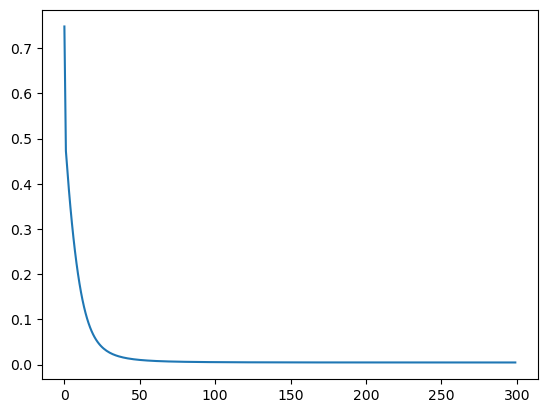

In [1401]:
plt.plot(losses)

In [1402]:
weight, bias

(tensor([[ 0.3914],
         [ 0.0471],
         [ 0.1761],
         [ 0.1127],
         [ 0.0330],
         [ 0.0303],
         [ 0.0411],
         [ 0.0635],
         [ 0.0804],
         [ 0.0142],
         [ 0.0647],
         [-0.0226]], dtype=torch.float64, requires_grad=True),
 tensor([[0.1112]], requires_grad=True))

In [1403]:
weight.detach().numpy() * 0.396564 + bias.detach().numpy()

array([[0.26640401],
       [0.12987261],
       [0.18103586],
       [0.15588881],
       [0.12427334],
       [0.12321103],
       [0.1274781 ],
       [0.13636185],
       [0.14307989],
       [0.11681619],
       [0.1368558 ],
       [0.10222623]])

In [1404]:
# X_test @ weight.detach() + bias.detach()

In [1405]:
result = X_test@ weight.detach() + bias.detach()


In [1406]:
from torchmetrics import R2Score

r2score = R2Score()
r2 = r2score(X_test @ weight.detach() + bias.detach(), y_test)
print("R^2 Score:", r2.item())


R^2 Score: 0.6727725267410278


In [1407]:
y_test[:5], result

(tensor([[0.3888],
         [0.5006],
         [0.2674],
         [0.4478],
         [0.1443]], dtype=torch.float64),
 tensor([[0.5611],
         [0.4684],
         [0.2325],
         [0.2529],
         [0.2527],
         [0.5108],
         [0.3349],
         [0.4757],
         [0.7471],
         [0.4970],
         [0.5631],
         [0.3199],
         [0.3067],
         [0.4354],
         [0.4157],
         [0.4296],
         [0.5457],
         [0.2373],
         [0.3900],
         [0.3242],
         [0.4554],
         [0.4592],
         [0.6764],
         [0.7130],
         [0.4099],
         [0.2932],
         [0.3987],
         [0.5467],
         [0.8662],
         [0.3451],
         [0.4387],
         [0.3949],
         [0.4399],
         [0.4888],
         [0.3523],
         [0.2138],
         [0.5538],
         [0.5101],
         [0.5069],
         [0.3220],
         [0.6717],
         [0.5858],
         [0.3702],
         [0.8132],
         [0.3949],
         [0.4648],
        

In [1408]:
X_test[1]

tensor([0.4688, 0.3869, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000,
        0.0000, 1.0000, 1.0000], dtype=torch.float64)

In [1409]:
normalized_value = 0.1997

In [1410]:
torch.exp(torch.tensor([[0.1997]], dtype=torch.float64))

tensor([[1.2210]], dtype=torch.float64)

In [1411]:
4.056535e+06

4056535.0

In [1412]:
y_test[1]

tensor([0.5006], dtype=torch.float64)